# Car Price Prediction

#### Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

##### 1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

##### 2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. 
The complete life cycle of data science that I have used in this project are as follows:

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_uc = pd.read_csv("Used_Cars_Data.csv",index_col=0)
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Honda Jazz,7.05 Lakh,V CVT,"64,554 kms",Petrol,Automatic
1,2018 Hyundai Verna,10.00 Lakh,VTVT 1.6 SX Option,"54,195 kms",Petrol,Manual
2,2018 Maruti Alto 800,3.50 Lakh,LXI,"5,709 kms",Petrol,Manual
3,2016 Honda Jazz,6.25 Lakh,V CVT,"39,821 kms",Petrol,Automatic
4,2018 Hyundai i20,6.37 Lakh,1.2 Spotz,"29,771 kms",Petrol,Manual
...,...,...,...,...,...,...
555,2014 Maruti Alto K10,2.90 Lakh,VXI,"21,191 kms",Petrol,Manual
556,2015 Mahindra XUV500,8.59 Lakh,W10 AWD,"47,454 kms",Diesel,Manual
557,2019 MG Hector,16.61 Lakh,Sharp DCT,"34,880 kms",Petrol,Automatic
558,2018 Renault Captur,7.45 Lakh,1.5 Petrol RXL,"15,245 kms",Petrol,Manual


There are 2880 rows and 6 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable **"Price"** which stores the price of the used cars and it is continuous in nature which makes this to be a **"Regression Problem"**.

# Preprocessing and Exploratory Data Analysis (EDA)

In [3]:
# Checking shape of my dataset
df_uc.shape

(2880, 6)

In [4]:
# Checking all column names of dataset
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant'], dtype='object')

In [5]:
# Checking the data types of all columns in dataset
df_uc.dtypes

Brand         object
Price         object
Model         object
KMS_driven    object
Fuel          object
Variant       object
dtype: object

In [6]:
df_uc['Price']

0       7.05 Lakh
1      10.00 Lakh
2       3.50 Lakh
3       6.25 Lakh
4       6.37 Lakh
          ...    
555     2.90 Lakh
556     8.59 Lakh
557    16.61 Lakh
558     7.45 Lakh
559    10.72 Lakh
Name: Price, Length: 2880, dtype: object

In [7]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       2880 non-null   object
 1   Price       2880 non-null   object
 2   Model       2880 non-null   object
 3   KMS_driven  2880 non-null   object
 4   Fuel        2880 non-null   object
 5   Variant     2880 non-null   object
dtypes: object(6)
memory usage: 157.5+ KB


All the columns are of object data type, but we can see some columns which need to be converted into integer data type.

In [8]:
# Value counts of each column.
for i in df_uc.columns:
        print(df_uc[i].value_counts())
        print('-------------------------------------------------')

2016 Maruti Baleno          68
2016 Hyundai i20            56
2018 Maruti Alto 800        56
2016 Hyundai Creta          56
2017 Hyundai i20            52
                            ..
2013 Volkswagen Polo         4
2014 Nissan Micra Active     4
2020 Maruti XL6              4
2018 Maruti Swift            4
2020 Hyundai Creta           4
Name: Brand, Length: 261, dtype: int64
-------------------------------------------------
3.40 Lakh    32
5.40 Lakh    28
4.20 Lakh    28
3.45 Lakh    24
3.10 Lakh    24
             ..
3.09 Lakh     4
6.28 Lakh     4
6.60 Lakh     4
5.66 Lakh     4
5.44 Lakh     4
Name: Price, Length: 392, dtype: int64
-------------------------------------------------
VXI                           128
LXI                           108
VXI BS IV                      48
1.2 Delta                      48
1.2 Alpha                      44
                             ... 
1.6 VTVT AT SX                  4
2010-2014 VXI                   4
SX Turbo                        4

In [9]:
# Checking unique values of each column
df_uc.nunique()

Brand         261
Price         392
Model         322
KMS_driven    571
Fuel            3
Variant         2
dtype: int64

### Feature Extraction

In [10]:
# Extracting 'Price' values from Price
df_uc['Price'] = df_uc['Price'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Honda Jazz,7.05,V CVT,"64,554 kms",Petrol,Automatic
1,2018 Hyundai Verna,10.00,VTVT 1.6 SX Option,"54,195 kms",Petrol,Manual
2,2018 Maruti Alto 800,3.50,LXI,"5,709 kms",Petrol,Manual
3,2016 Honda Jazz,6.25,V CVT,"39,821 kms",Petrol,Automatic
4,2018 Hyundai i20,6.37,1.2 Spotz,"29,771 kms",Petrol,Manual
...,...,...,...,...,...,...
555,2014 Maruti Alto K10,2.90,VXI,"21,191 kms",Petrol,Manual
556,2015 Mahindra XUV500,8.59,W10 AWD,"47,454 kms",Diesel,Manual
557,2019 MG Hector,16.61,Sharp DCT,"34,880 kms",Petrol,Automatic
558,2018 Renault Captur,7.45,1.5 Petrol RXL,"15,245 kms",Petrol,Manual


In [11]:
# Extracting 'KMS_driven' from KMS_driven
df_uc['KMS_driven'] = df_uc['KMS_driven'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Honda Jazz,7.05,V CVT,"64,554",Petrol,Automatic
1,2018 Hyundai Verna,10.00,VTVT 1.6 SX Option,"54,195",Petrol,Manual
2,2018 Maruti Alto 800,3.50,LXI,"5,709",Petrol,Manual
3,2016 Honda Jazz,6.25,V CVT,"39,821",Petrol,Automatic
4,2018 Hyundai i20,6.37,1.2 Spotz,"29,771",Petrol,Manual
...,...,...,...,...,...,...
555,2014 Maruti Alto K10,2.90,VXI,"21,191",Petrol,Manual
556,2015 Mahindra XUV500,8.59,W10 AWD,"47,454",Diesel,Manual
557,2019 MG Hector,16.61,Sharp DCT,"34,880",Petrol,Automatic
558,2018 Renault Captur,7.45,1.5 Petrol RXL,"15,245",Petrol,Manual


In [12]:
# Extracting Manufacturing Year from Brand
df_uc['Manuf_Year'] = df_uc['Brand'].str.split().str[0]
df_uc['Brand'] = df_uc['Brand'].str.split().str[1]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,Honda,7.05,V CVT,"64,554",Petrol,Automatic,2018
1,Hyundai,10.00,VTVT 1.6 SX Option,"54,195",Petrol,Manual,2018
2,Maruti,3.50,LXI,"5,709",Petrol,Manual,2018
3,Honda,6.25,V CVT,"39,821",Petrol,Automatic,2016
4,Hyundai,6.37,1.2 Spotz,"29,771",Petrol,Manual,2018
...,...,...,...,...,...,...,...
555,Maruti,2.90,VXI,"21,191",Petrol,Manual,2014
556,Mahindra,8.59,W10 AWD,"47,454",Diesel,Manual,2015
557,MG,16.61,Sharp DCT,"34,880",Petrol,Automatic,2019
558,Renault,7.45,1.5 Petrol RXL,"15,245",Petrol,Manual,2018


In [13]:
# Converting object data type columns to float data type
df_uc = df_uc.astype({'Price':'float', 'Manuf_Year':'int'})

In [14]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

In [15]:
# Checking null values in the dataset
df_uc.isnull().sum()

Brand         0
Price         0
Model         0
KMS_driven    0
Fuel          0
Variant       0
Manuf_Year    0
dtype: int64

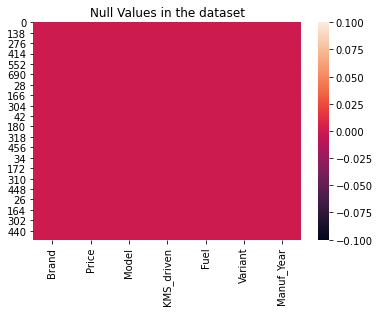

In [16]:
# Visualizing null values in the dataset
sns.heatmap(df_uc.isnull())
plt.title("Null Values in the dataset")
plt.show()

There are no null values present in the dataset.

In [17]:
# Checking description of data in the dataset
df_uc.describe()

,Price,Manuf_Year
count,2880.000000,2880.000000
mean,139.627917,2016.923611
std,2503.501989,2.229238
min,1.090000,2003.000000
25%,4.350000,2016.000000
50%,5.875000,2017.000000
75%,8.342500,2018.000000
max,50000.000000,2022.000000


In [18]:
#Checking for empty observations in target column
df_uc.loc[df_uc['Price'] == " "]

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year


No empty observations.

# Data Visualization

### Univariate Analysis

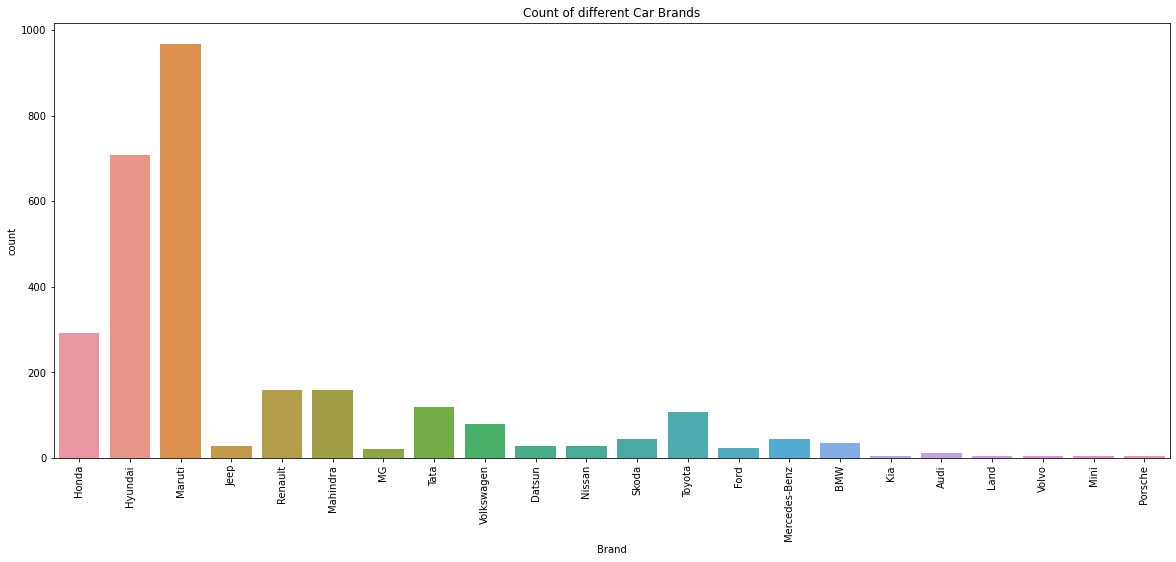

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(df_uc["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Most of the used cars are of the brand Maruti, followed by Hyundai, Honda, Renault, Mahindra, Tata & Toyota. There are very few luxury brand used cars.

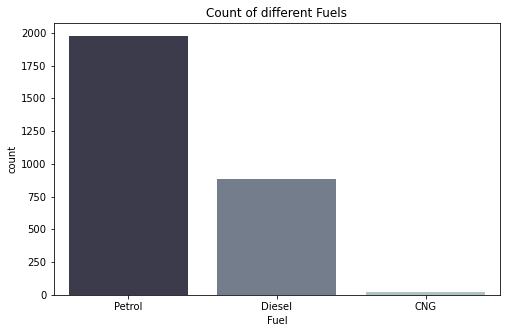

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df_uc["Fuel"],palette='bone')
plt.title("Count of different Fuels")
plt.show()

The major fuel type is Petrol, followed by Diesel and lastly, CNG.

Manual       2316
Automatic     564
Name: Variant, dtype: int64


<AxesSubplot:ylabel='Variant'>

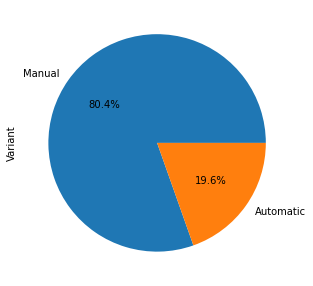

In [21]:
plt.figure(figsize=(10,5))
print(df_uc['Variant'].value_counts())
df_uc['Variant'].value_counts().plot.pie(autopct='%1.1f%%')

Most of the Used cars are of manual Variant (80.4 %). The rest are Automatic (19.6%).

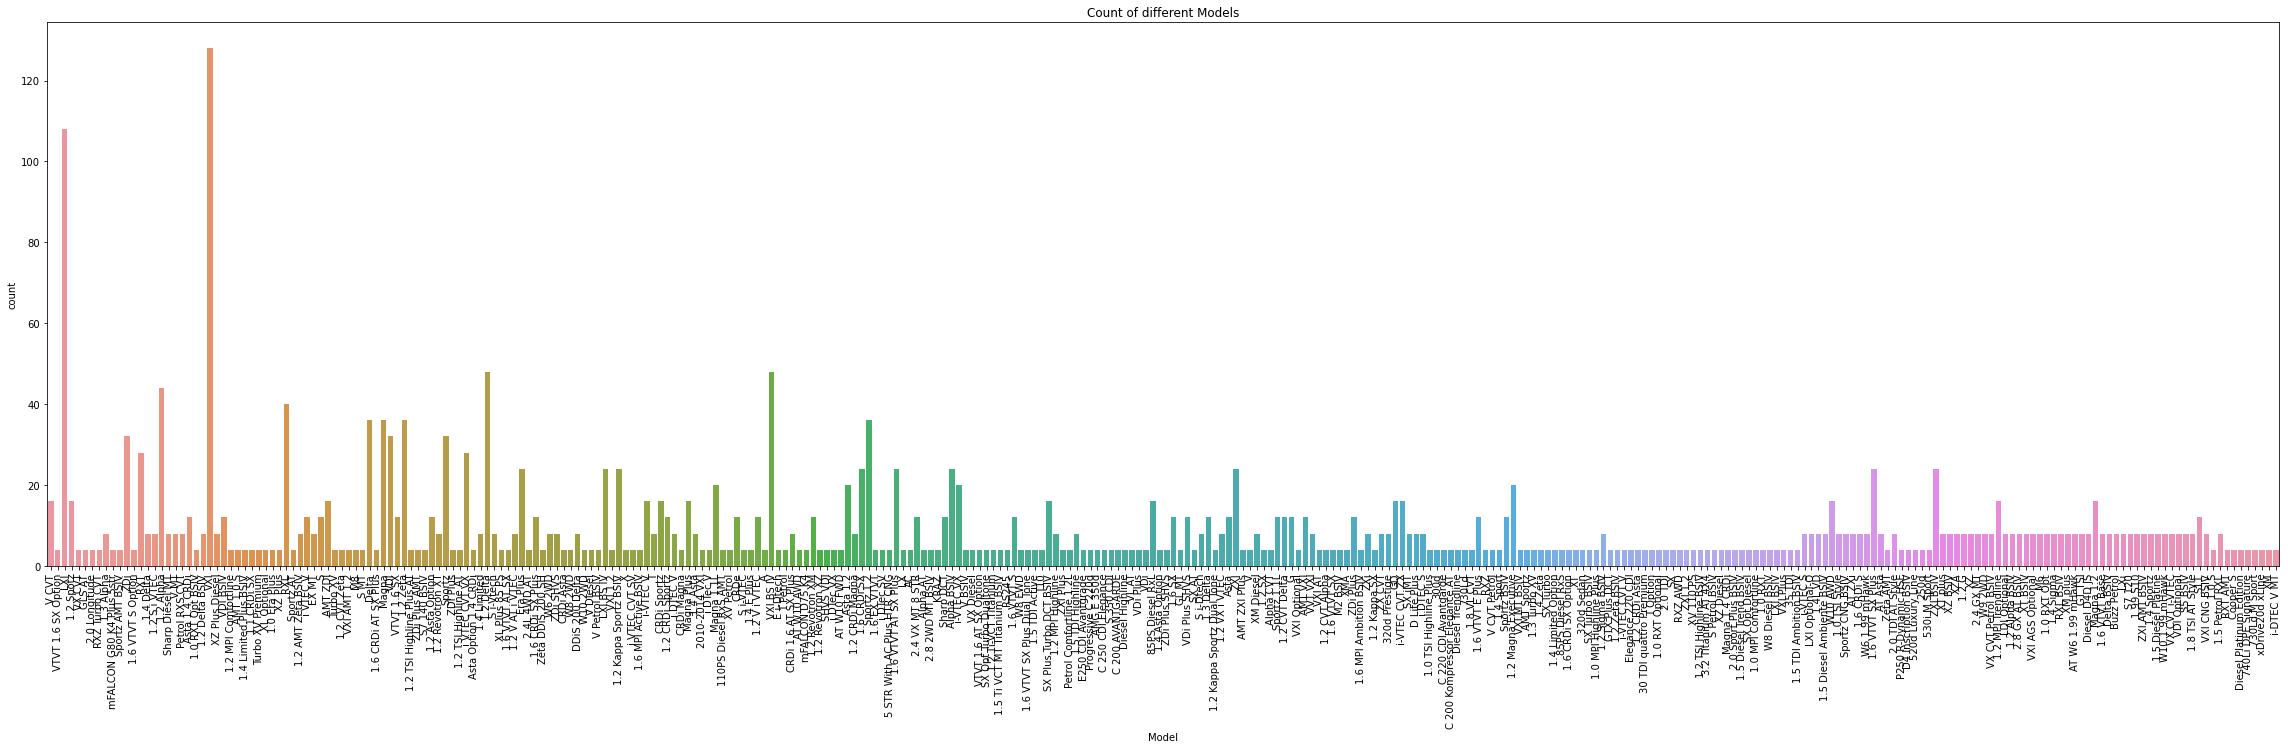

In [22]:
plt.figure(figsize=[40,10])
sns.countplot(df_uc['Model'])
plt.title("Count of different Models")
plt.xticks(rotation=90)
plt.show()

The count of VXI, LXI, VXI BS IV, 1.2 Delta & 1.2 Alpha are highest among all the models.

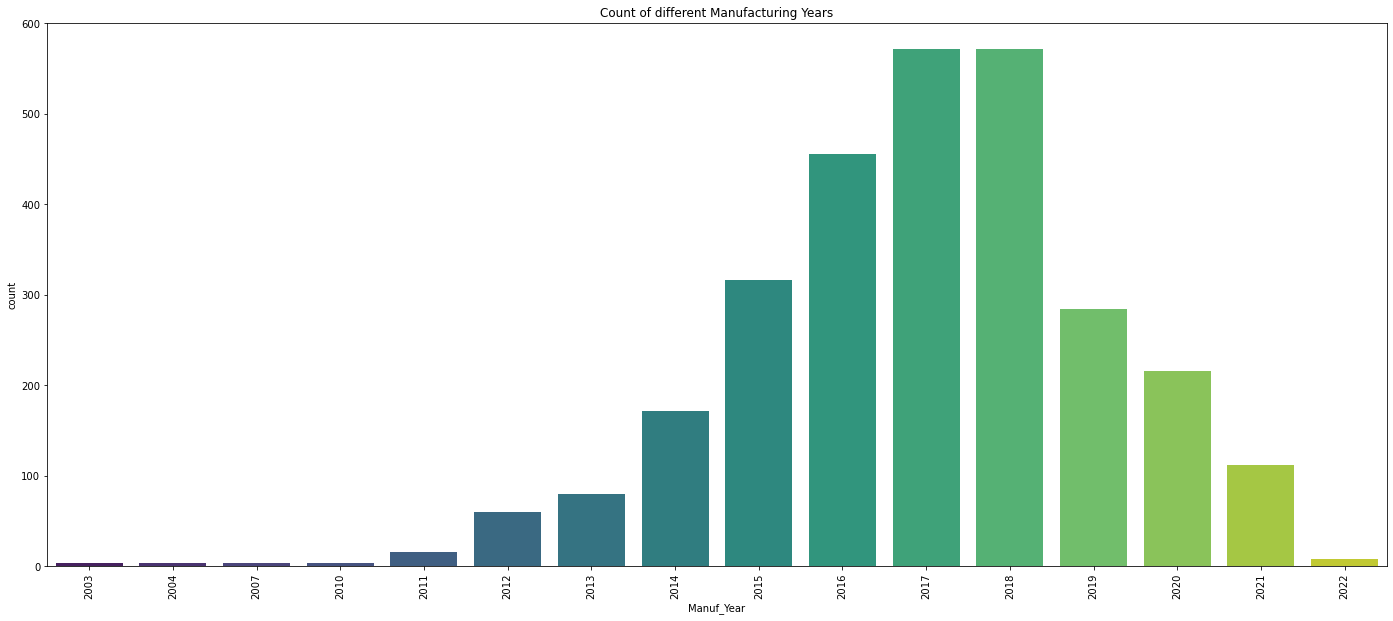

In [23]:
plt.figure(figsize=[24,10])
sns.countplot(df_uc['Manuf_Year'],palette='viridis')
plt.title("Count of different Manufacturing Years")
plt.xticks(rotation=90)
plt.show()

Most of the Used cars are manufactured in 2017 and 2018. Followed by 2016, 2015 & 2019.

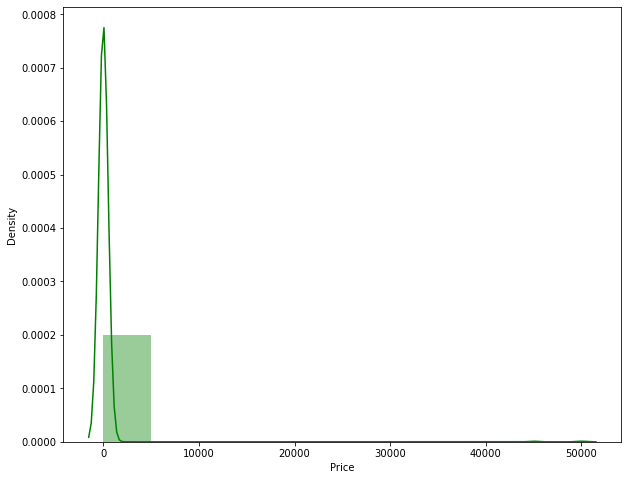

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(df_uc["Price"],bins=10,color='green')
plt.show()

The distribution of Price is normal but it is skewed to the right.

### Bivariate Analysis

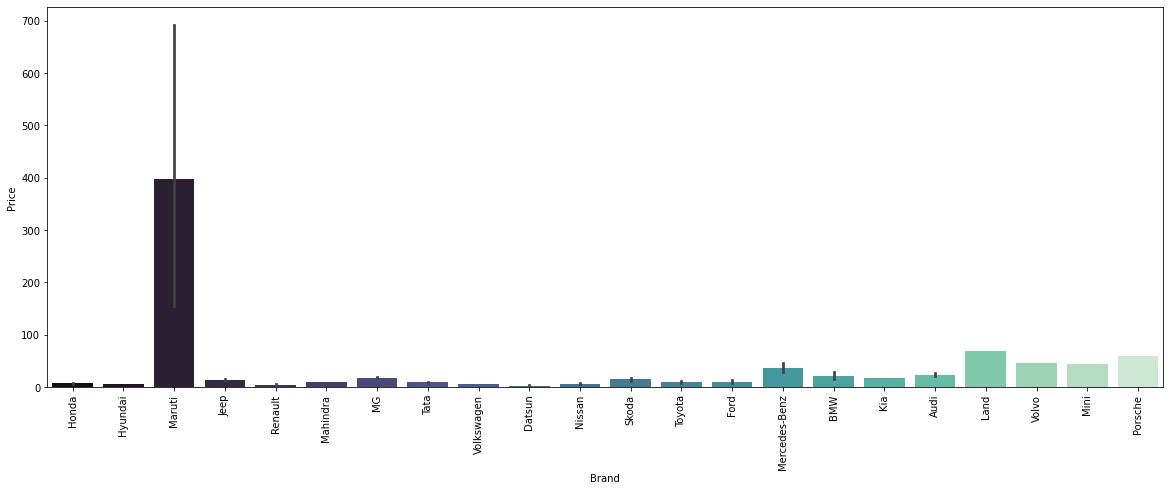

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df_uc,palette='mako')
plt.xticks(rotation=90)
plt.show();

**Price vs Brand**: Most of the used cars are of the Maruti Brand. The Prices of Maruti, Mercedes Benz & Audi are high.

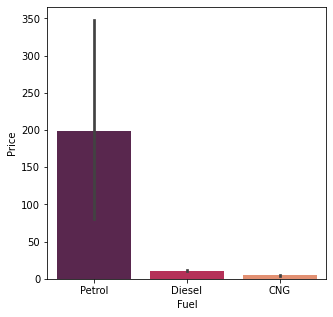

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df_uc,palette='rocket')
plt.show();

**Price vs Fuel**: Most of the cars use petrol as their fuel type, they are also the ones with the highest prices. Next, Diesel and CNG are the lowest .

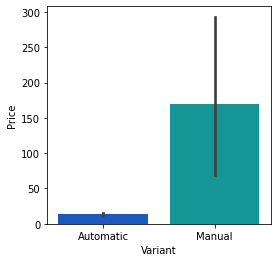

In [27]:
plt.figure(figsize=(4,4))
sns.barplot(x='Variant',y='Price',data=df_uc,palette='winter')
plt.show();

**Price vs Fuel**: Most of the used cars are Manual, they are also the ones with the highest prices.

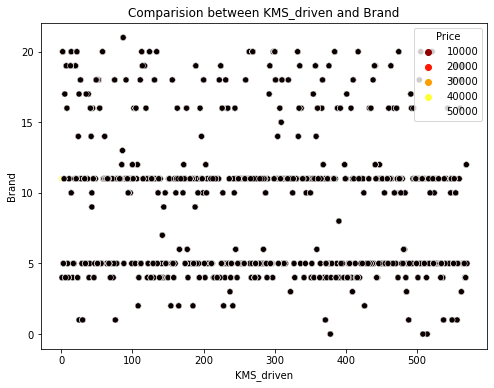

In [33]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Brand'],hue=df_uc['Price'],palette="hot");

The above visualization shows the relationship between KMS_driven and Brand in terms of Price. The majority of the cars have kms driven in between 100 & 500. There are a few outliers present in Brand. There is no positive or negative correlation between either Brand or KMS_driven towards price. 

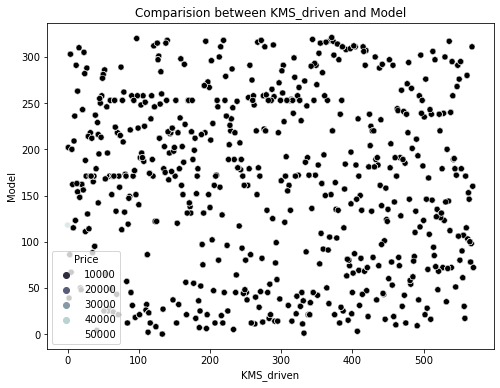

In [34]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Model'],hue=df_uc['Price'],palette="bone");

The above visualization shows the relationship between KMS_driven and Model in terms of Price. There is no relation of the two variables with the target as the Price is scattered all around.


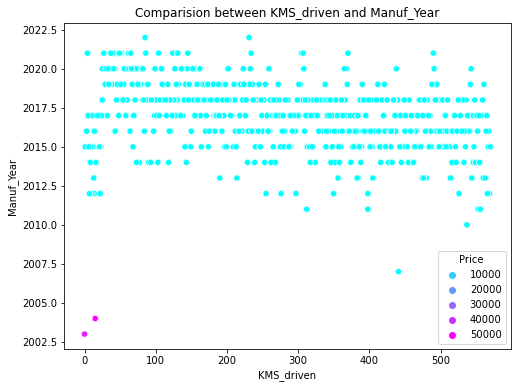

In [35]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Manuf_Year'],hue=df_uc['Price'],palette="cool");

The above visualization shows the relationship between KMS_driven and Manuf_Year in terms of Price. Most of the car's manufacturing years are between 2015 & 2020. There are outliers present in the Manuf_Year column. Manuf_Year is positively correlated with our target Price.


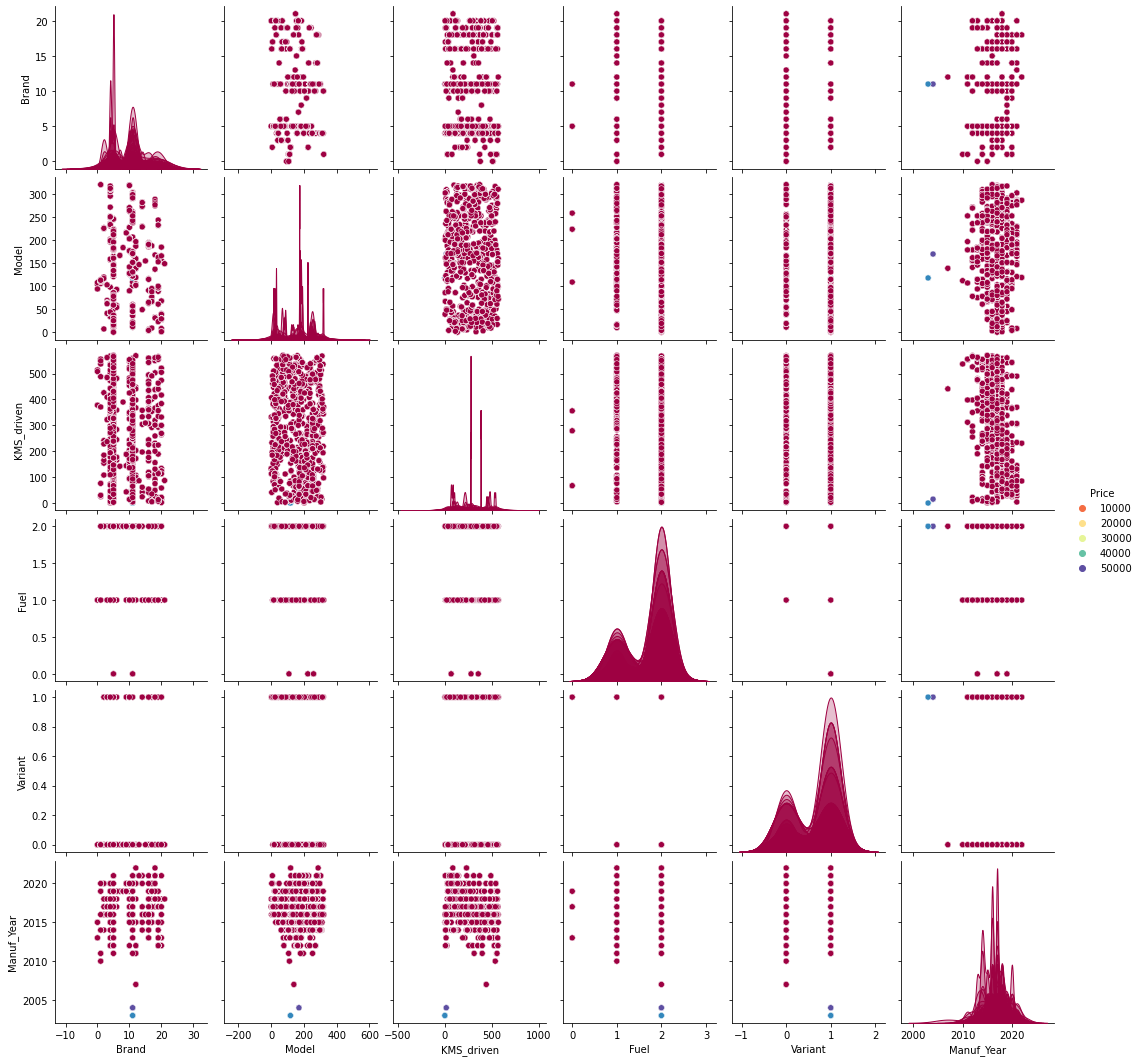

In [36]:
sns.pairplot(df_uc,hue="Price",palette="Spectral")
plt.show()

# Encoding the Data Frame

In [28]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant',
       'Manuf_Year'],
      dtype='object')

In [29]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

Label Encoder is used to encode the Data Frame.

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
df_uc['Brand'] = le.fit_transform(df_uc['Brand'])
df_uc['Model'] = le.fit_transform(df_uc['Model'])
df_uc['KMS_driven'] = le.fit_transform(df_uc['KMS_driven'])
df_uc['Fuel'] = le.fit_transform(df_uc['Fuel'])
df_uc['Variant'] = le.fit_transform(df_uc['Variant'])

In [32]:
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,4,7.05,233,408,2,0,2018
1,5,10.00,247,336,2,1,2018
2,11,3.50,171,306,2,1,2018
3,4,6.25,233,230,2,0,2016
4,5,6.37,37,148,2,1,2018
...,...,...,...,...,...,...,...
555,11,2.90,253,93,2,1,2014
556,10,8.59,265,287,1,1,2015
557,9,16.61,216,188,2,0,2019
558,16,7.45,65,54,2,1,2018


# Outliers

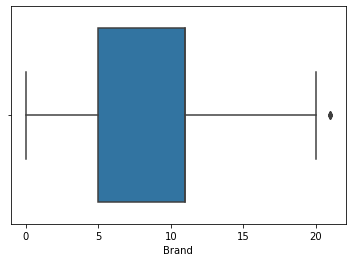

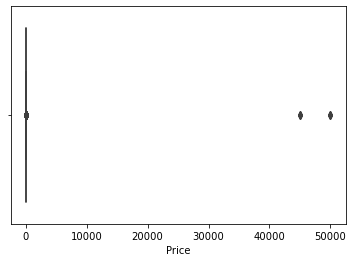

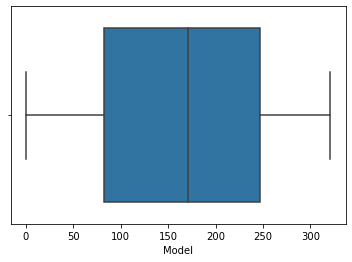

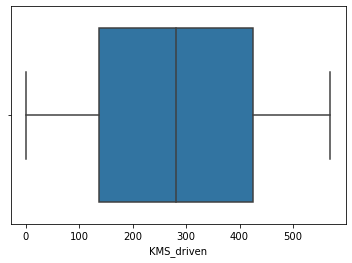

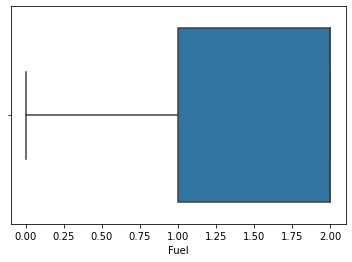

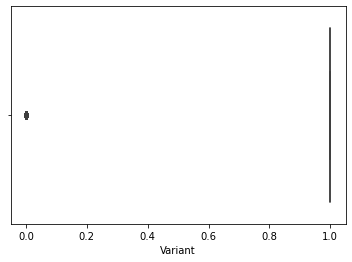

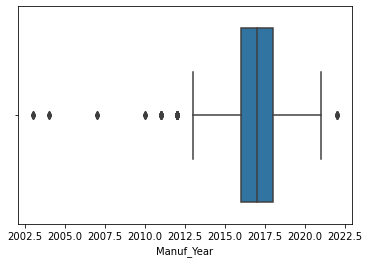

In [37]:
for i in df_uc.columns:
    sns.boxplot(df_uc[i])
    plt.show()

We can see outliers present in the columns : "Brand", "Price", "Variant" & "Manuf_Year". Since Price is our target variable we shall not remove outliers from this column.

# Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [38]:
df_outliers=df_uc[["Brand", "Variant", "Manuf_Year"]]

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df_uc[(z<3).all(axis=1)]
df_usedcars

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,4,7.05,233,408,2,0,2018
1,5,10.00,247,336,2,1,2018
2,11,3.50,171,306,2,1,2018
3,4,6.25,233,230,2,0,2016
4,5,6.37,37,148,2,1,2018
...,...,...,...,...,...,...,...
555,11,2.90,253,93,2,1,2014
556,10,8.59,265,287,1,1,2015
557,9,16.61,216,188,2,0,2019
558,16,7.45,65,54,2,1,2018


In [40]:
df_usedcars.shape

(2864, 7)

In [41]:
df_uc.shape

(2880, 7)

In [42]:
Data_loss=((2880-2864)/2880)*100
Data_loss

0.5555555555555556

The data loss after z-score method is 0.56 %.

# Skewness

In [43]:
df_usedcars.skew()

Brand         0.412571
Price         5.997404
Model        -0.127368
KMS_driven    0.034904
Fuel         -0.952603
Variant      -1.547413
Manuf_Year   -0.248060
dtype: float64

There is high skewness in columns "Price", "Fuel" &" Variant". Since Price is our target variable we shall not remove skewness from this column 

In [44]:
df_skew=['Fuel','Variant']

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [46]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)

In [47]:
df_usedcars[df_skew].skew()

Fuel      -0.802006
Variant   -1.547413
dtype: float64

The skewness is reduced in the columns.

# Correlation

In [48]:
# Correlation of dataset
df_usedcars.corr()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
Brand,1.000000,0.022589,-0.048867,-0.100966,-0.071948,0.074238,0.110709
Price,0.022589,1.000000,-0.037474,-0.046742,-0.237512,-0.411513,0.262961
Model,-0.048867,-0.037474,1.000000,-0.069768,-0.059916,-0.001961,-0.011318
KMS_driven,-0.100966,-0.046742,-0.069768,1.000000,-0.285397,0.031729,-0.350468
Fuel,-0.071948,-0.237512,-0.059916,-0.285397,1.000000,-0.036309,0.161718
Variant,0.074238,-0.411513,-0.001961,0.031729,-0.036309,1.000000,-0.088951
Manuf_Year,0.110709,0.262961,-0.011318,-0.350468,0.161718,-0.088951,1.000000


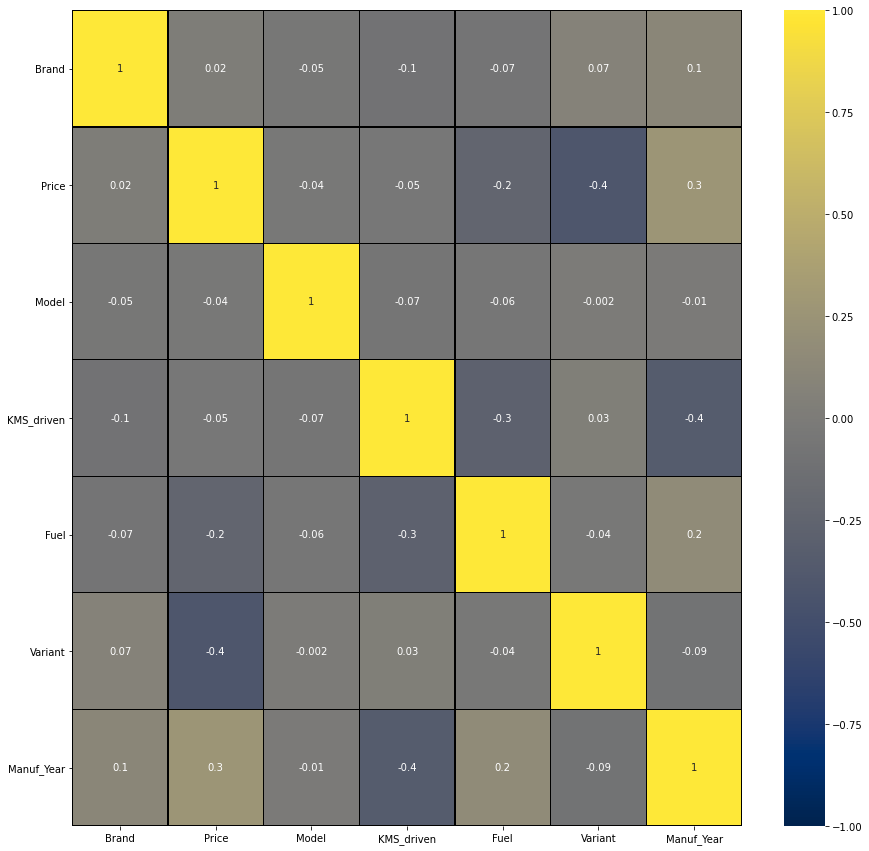

In [49]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cividis")
plt.yticks(rotation=0);

From the above correlation map, we see that the columns, `Variant` & `Fuel` are highly neagtively correlated with our target `Price`. The column `Manuf_Year` is highly positively correlated with our target.

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

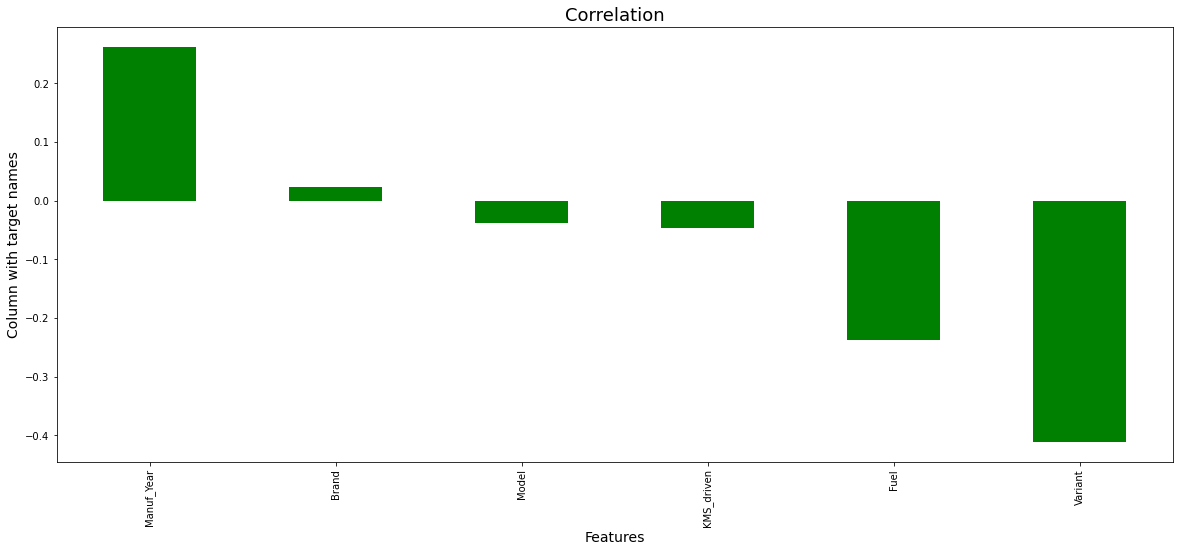

In [50]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Regression Model Building

In [51]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]

In [52]:
x.shape

(2864, 6)

In [53]:
y.shape

(2864,)

# Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Brand,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,-1.144635,0.735595,0.756356,0.676814,-2.037420,0.490606
1,-0.941874,0.886923,0.322397,0.676814,0.490817,0.490606
2,0.274690,0.065428,0.141581,0.676814,0.490817,0.490606
3,-1.144635,0.735595,-0.316488,0.676814,-2.037420,-0.475760
4,-0.941874,-1.382995,-0.810719,0.676814,0.490817,0.490606
...,...,...,...,...,...,...
2859,0.274690,0.951777,-1.142216,0.676814,0.490817,-1.442126
2860,0.071929,1.081487,0.027064,-1.471757,0.490817,-0.958943
2861,-0.130832,0.551839,-0.569630,0.676814,-2.037420,0.973789
2862,1.288493,-1.080340,-1.377277,0.676814,0.490817,0.490606


# VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.041128,Brand
1,1.017086,Model
2,1.237818,KMS_driven
3,1.116502,Fuel
4,1.015526,Variant
5,1.164544,Manuf_Year


The VIF values are all below 10 so there is no high Multicollinearity in the columns.

# Best Random State

In [56]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [57]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.8373333166043269  on Random State : 156


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [59]:
x_train.shape

(2004, 6)

In [60]:
x_test.shape

(860, 6)

In [61]:
y_train.shape

(2004,)

In [62]:
y_test.shape

(860,)

# Linear Regression

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.288549715695679
Mean absolute error:  3.118996187463945
Mean squared error:  25.73703582600029
Root Mean squared error:  5.0731682237040285


# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.9998778948424668
Mean absolute error:  0.007581395348837343
Mean squared error:  0.004417209302325582
Root Mean squared error:  0.06646208921126075


# KNearest Neighbors Regressor

In [66]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.8373333166043269
Mean absolute error:  0.9138651162790697
Mean squared error:  5.884540846511627
Root Mean squared error:  2.425807256669752


# SVR

In [67]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.4441554732143975
Mean absolute error:  1.8211221893834642
Mean squared error:  20.10792716676738
Root Mean squared error:  4.484186343894216


# Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.9952502742515288
Mean absolute error:  0.17314732558139714
Mean squared error:  0.17182347726744163
Root Mean squared error:  0.4145159553834347


# Gradient Boosting Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.90366480525037
Mean absolute error:  1.3012580701924499
Mean squared error:  3.484969242791666
Root Mean squared error:  1.8668072323600169


# Extra Trees Regressor

In [70]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.999771449398171
Mean absolute error:  0.009780465116287402
Mean squared error:  0.00826792139534876
Root Mean squared error:  0.09092811113923328


# XGBoost Regressor

In [71]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  0.9992477708647196
Mean absolute error:  0.09725342417872229
Mean squared error:  0.027212229204466924
Root Mean squared error:  0.16496129608022278


From the above regression models, the highest R2 score belongs to Decision Tree Regressor. Followed by Extra Trees Regressor, XGBoost Regressor & Random Forest Regressor.

Next, Gradient Boosting Regressor & KNearest Neighbors Regressor.

The lowest R2 scores belong to SVR Model & Linear Regression Model.

# Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.13250535023436025


In [74]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  -0.1862538621312691


In [75]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  -0.21498179641577728


In [76]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.28240254110337226


In [77]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.3055737115710514


In [78]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.3141536785578286


In [79]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.46656127020744903


In [80]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.28010972886126123


The highest cross validation score belonmgs to Extra Trees Regressor, followed by Gradient Boosting Regressor & Random Forest Regressor.

Next, XGBoost Regressor & SVR Model.

The cross validation scores of KNearest Neighbors Regressor, Decision Tree Regressor & Linear Regression Model are negative and are the lowest of all the scores.

# Hyper Parameter Tuning

Since the R2 Score & Cross Validation Score are both the highest in `Extra Trees Regressor` we shall consider it for hyper parameter tuning.

We will use GridSearchCV for hyper parameter tuning.

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_etr = GridSearchCV(etr, param_grid = parameters, cv = 5)

In [83]:
grid_etr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1]})

In [84]:
grid_etr.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 10, 'n_jobs': 1}

In [85]:
Best_model = ExtraTreesRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.9997575731119528
Mean absolute error:  0.009632558139535638
Mean squared error:  0.008769902325581388
Root Mean squared error:  0.09364775665002012


After Hyper Parameter Tuning, we have got a better R2 score of 99.97 %.

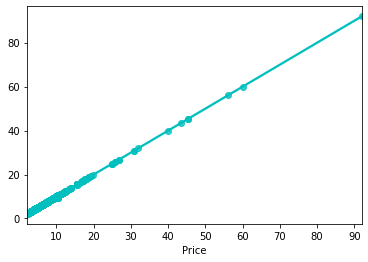

In [86]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

# Saving Model

In [87]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [88]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 8.05 ,  3.71 ,  4.4  ,  4.6  ,  9.29 ,  3.7  , 11.79 ,  3.2  ,
        4.1  ,  3.85 ,  4.4  ,  3.26 ,  9.75 ,  5.4  ,  5.5  ,  8.12 ,
        5.54 ,  4.2  , 10.72 , 19.35 ,  6.15 ,  5.4  ,  5.98 ,  3.35 ,
        3.95 ,  6.92 ,  5.04 ,  3.05 ,  7.05 ,  6.25 ,  5.52 ,  6.92 ,
        5.74 ,  3.86 ,  2.57 ,  7.25 ,  6.25 ,  6.78 ,  9.95 ,  8.59 ,
        2.61 , 32.   ,  9.26 ,  3.8  ,  4.4  ,  3.4  ,  3.28 , 11.7  ,
        2.91 ,  4.69 ,  3.34 ,  3.8  ,  6.67 ,  5.11 ,  8.59 ,  8.6  ,
        6.   ,  4.35 ,  4.83 ,  5.85 ,  8.59 ,  8.25 ,  4.4  ,  6.28 ,
       30.7  ,  9.8  ,  8.91 ,  7.6  ,  3.1  ,  8.34 ,  3.73 , 12.7  ,
        7.25 ,  2.9  , 13.49 , 18.8  ,  7.3  ,  4.63 ,  2.46 ,  9.85 ,
        8.23 ,  5.54 ,  9.06 ,  5.07 ,  5.15 ,  8.93 ,  3.4  ,  9.89 ,
        5.04 ,  5.85 ,  4.95 ,  4.5  ,  3.8  ,  4.58 ,  4.35 ,  4.75 ,
        7.03 ,  3.1  ,  9.85 ,  6.88 ,  4.96 ,  3.4  , 12.4  ,  4.312,
       15.59 , 10.23 ,  2.35 , 13.85 ,  6.26 ,  3.05 , 18.77 ,  3.8  ,
      

In [89]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,850,851,852,853,854,855,856,857,858,859
Predicted,8.05,3.71,4.4,4.6,9.29,3.7,11.79,3.2,4.1,3.85,...,5.13,6.47,3.75,5.85,25.0,8.01,4.75,12.24,4.75,3.41
Actual,8.05,3.71,4.4,4.6,9.29,3.7,11.79,3.2,4.1,3.85,...,5.13,6.47,3.75,5.85,25.0,8.01,4.75,12.24,4.75,3.41


Above are the predicted values and the actual values.They are quite similar to the Actual values.

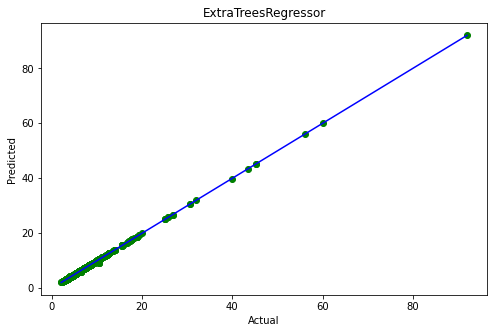

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, c='green')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("ExtraTreesRegressor")
plt.show()